In [1]:
import pandas as pd  
#import pyodbc
import os

In [ ]:
! pip install pyodbc

: 

Plotting SST190009L_cineraria_f.jpg with coordinates: [(1303.0, 876.0), (945.0, 826.0), (984.0, 810.0), (1062.0, 801.0), (1122.0, 804.0), (1189.0, 723.0), (1143.0, 716.0), (1050.0, 738.0), (991.0, 729.0), (932.0, 754.0), (734.0, 744.0), (592.0, 657.0), (881.0, 658.0), (1122.0, 618.0), (915.0, 579.0), (903.0, 525.0), (587.0, 647.0), (612.0, 580.0)]


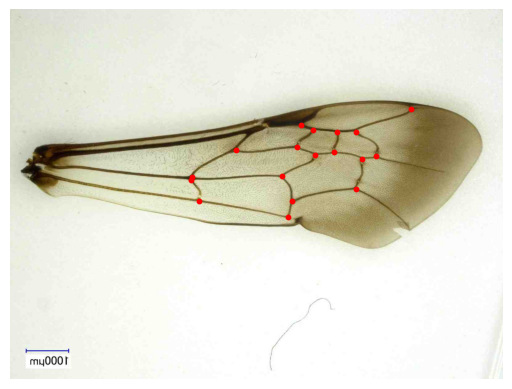

Plotting SST190009R_cineraria_f.jpg with coordinates: [(1326.0, 917.0), (976.0, 816.0), (1010.0, 807.0), (1099.0, 809.0), (1153.0, 821.0), (1226.0, 750.0), (1188.0, 737.0), (1095.0, 745.0), (1031.0, 727.0), (972.0, 744.0), (779.0, 704.0), (657.0, 596.0), (934.0, 642.0), (1180.0, 636.0), (984.0, 570.0), (976.0, 515.0), (650.0, 588.0), (680.0, 527.0)]


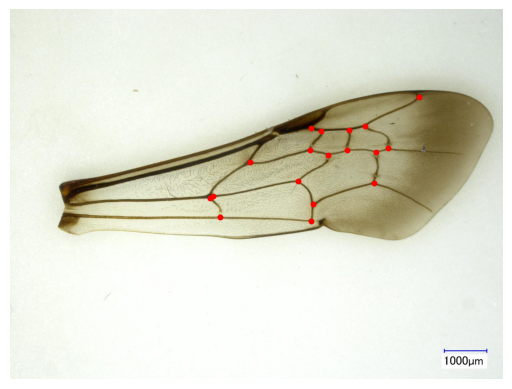

Plotting SST190035L_cineraria_f.jpg with coordinates: [(1327.0, 798.0), (960.0, 756.0), (987.0, 741.0), (1072.0, 731.0), (1136.0, 733.0), (1185.0, 649.0), (1142.0, 642.0), (1053.0, 668.0), (996.0, 663.0), (937.0, 688.0), (737.0, 680.0), (603.0, 605.0), (880.0, 600.0), (1120.0, 547.0), (918.0, 512.0), (904.0, 466.0), (593.0, 595.0), (607.0, 535.0)]


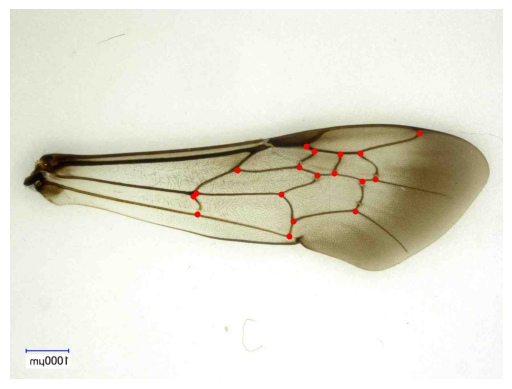

Plotting SST190035R_cineraria_f.jpg with coordinates: [(1239.0, 929.0), (886.0, 829.0), (921.0, 816.0), (999.0, 818.0), (1062.0, 831.0), (1125.0, 755.0), (1083.0, 744.0), (995.0, 752.0), (938.0, 737.0), (872.0, 754.0), (680.0, 714.0), (554.0, 616.0), (834.0, 656.0), (1078.0, 645.0), (885.0, 578.0), (878.0, 528.0), (547.0, 606.0), (578.0, 547.0)]


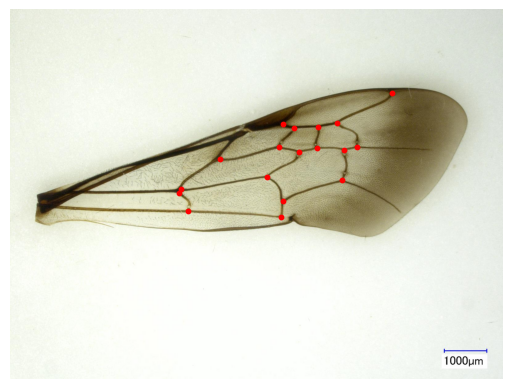

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def read_tps(file_path):
    with open(file_path, 'r') as file:
        data = []
        current_entry = {}
        coordinates = []

        for line in file:
            line = line.strip()
            if line.startswith("LM"):
                if current_entry:  # save previous entry if exists
                    current_entry['coordinates'] = coordinates
                    data.append(current_entry)
                current_entry = {}
                coordinates = []
                current_entry['LM'] = int(line.split('=')[1])
            elif line.startswith("IMAGE"):
                current_entry['IMAGE'] = line.split('=')[1]
            elif line.startswith("ID"):
                current_entry['ID'] = int(line.split('=')[1])
            else:
                # Add coordinates
                x, y = map(float, line.split())
                coordinates.append((x, y))
        
        # Append the last entry
        if current_entry:
            current_entry['coordinates'] = coordinates
            data.append(current_entry)

    return data

# def plot_image_with_coordinates(image_path, coordinates):
#     # Open the image
#     img = Image.open(image_path)
#     plt.figure()
#     plt.imshow(img)
    
#     # Extract x and y coordinates
#     x_coords, y_coords = zip(*coordinates)
    
#     # Plot the coordinates
#     plt.scatter(x_coords, y_coords, color='red', s=10)
    
#     plt.axis('off')  # Turn off the axis
#     plt.show()

def plot_image_with_coordinates(image_path, coordinates):
    # Open the image
    img = Image.open(image_path)
    img_height = img.size[1]
    plt.figure()
    plt.imshow(img)
    
    # Extract and flip y coordinates
    x_coords, y_coords = zip(*coordinates)
    y_coords = [img_height - y for y in y_coords]
    
    # Plot the coordinates
    plt.scatter(x_coords, y_coords, color='red', s=10)
    
    plt.axis('off')  # Turn off the axis
    plt.show()

# Example usage:
file_path = '/Users/dylan.geldenhuys/beewings_transferlearning/wings/Andrena_cineraria/A.cineraria.TPS'


tps_data = read_tps(file_path)
directory_path = os.path.dirname(file_path)

for entry in tps_data[:4]:
    image_file = entry['IMAGE']
    image_path = os.path.join(directory_path, image_file)
    coordinates = entry['coordinates']
    print(f"Plotting {image_file} with coordinates: {coordinates}")
    plot_image_with_coordinates(image_path, coordinates)




torch.Size([3, 244, 244])
tensor([[198.7075,  65.8800],
        [144.1125,  76.0467],
        [150.0600,  79.3000],
        [161.9550,  81.1300],
        [171.1050,  80.5200],
        [181.3225,  96.9900],
        [174.3075,  98.4133],
        [160.1250,  93.9400],
        [151.1275,  95.7700],
        [142.1300,  90.6867],
        [111.9350,  92.7200],
        [ 90.2800, 110.4100],
        [134.3525, 110.2067],
        [171.1050, 118.3400],
        [139.5375, 126.2700],
        [137.7075, 137.2500],
        [ 89.5175, 112.4433],
        [ 93.3300, 126.0667]])


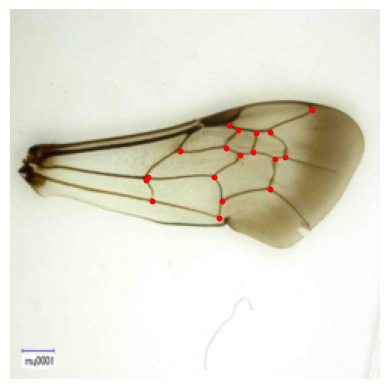

In [3]:

from data_class import LandmarksDataset
# Example usage
file_path = '/Users/dylan.geldenhuys/beewings_transferlearning/wings/Andrena_cineraria/A.cineraria.TPS'
image_dir = '/Users/dylan.geldenhuys/beewings_transferlearning/wings/Andrena_cineraria'
dataset = LandmarksDataset(tps_file=file_path, image_dir=image_dir)

# Example of getting a sample
image_tensor, landmarks_tensor = dataset[0]
print(image_tensor.shape)
print(landmarks_tensor)


# Function to plot image with landmarks
def plot_image_with_landmarks(image_tensor, landmarks_tensor):
    image_np = image_tensor.numpy().transpose((1, 2, 0))  # Convert to HWC format for plotting
    plt.figure()
    plt.imshow(image_np)
    
    x_coords, y_coords = landmarks_tensor[:, 0].numpy(), landmarks_tensor[:, 1].numpy()
    plt.scatter(x_coords, y_coords, color='red', s=10)
    
    plt.axis('off')  # Turn off the axis
    plt.show()

plot_image_with_landmarks(image_tensor, landmarks_tensor)

In [22]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torchvision import datasets, models, transforms

class resnet50(nn.Module):
    def __init__(self,num_classes=22):
        super().__init__()
        self.model_name='resnet50'
        self.model=models.resnet50(pretrained=True)
        self.model.conv1=nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.model.fc=nn.Linear(self.model.fc.in_features, num_classes)
        
    def forward(self, x):
        x=self.model(x)
        return x
    
# resnet50f = resnet50()
# resnet50f.load_state_dict(torch.load('/Users/dylan.geldenhuys/beewings_transferlearning/Final_repo/saved_models/model_resnet50_regressor_finetuned.pth', map_location=torch.device('cpu')))
# resnet50f.cpu()


resnet50(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [6]:
# split the dataset into validation and test sets
len_valid_test_set = int(0.2*len(dataset)) # 60% training, 20% validation, 20% testing

len_train_set = len(dataset) - len_valid_test_set*2

print("The length of Train set is {}".format(len_train_set))
print("The length of Valid set is {}".format(len_valid_test_set))
print("The length of Valid set is {}".format(len_valid_test_set))

train_dataset , valid_dataset, test_dataset  = torch.utils.data.random_split(dataset , [len_train_set, len_valid_test_set, len_valid_test_set], generator=torch.Generator().manual_seed(42))

# shuffle and batch the datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=24, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=20, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)

The length of Train set is 48
The length of Valid set is 16
The length of Valid set is 16


In [7]:
# helper functions
import sys
import pickle

def print_overwrite(step, total_step, loss, operation):
    sys.stdout.write('\r')
    if operation == 'train':
        sys.stdout.write("Train Steps: %d/%d  Loss: %.8f " % (step, total_step, loss))   
    else:
        sys.stdout.write("Valid Steps: %d/%d  Loss: %.8f " % (step, total_step, loss))
        
    sys.stdout.flush()

In [26]:
import time
import math
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pickle


network = resnet50(num_classes=36)
#network.load_state_dict(torch.load('/Users/dylan.geldenhuys/beewings_transferlearning/Final_repo/saved_models/model_resnet50_regressor_finetuned.pth', map_location=torch.device('cpu')))
# Load the state dictionary
# Load the state dictionary
state_dict = torch.load('/Users/dylan.geldenhuys/beewings_transferlearning/Final_repo/saved_models/model_resnet50_regressor_finetuned.pth', map_location=torch.device('cpu'))

# Get the current parameters of the last fully connected layer
in_features = network.model.fc.in_features
out_features = network.model.fc.out_features

# Create a new fully connected layer with the correct number of input and output features
new_fc = nn.Linear(in_features, 36)

# Initialize the new fully connected layer with the parameters from the state dictionary
new_fc_weight = torch.zeros((out_features, in_features))
new_fc_bias = torch.zeros(out_features)
new_fc_weight[:out_features, :] = state_dict['model.fc.weight']
new_fc_bias[:out_features] = state_dict['model.fc.bias']
new_fc.weight.data = new_fc_weight
new_fc.bias.data = new_fc_bias

# Pad the weight and bias tensors to accommodate the new number of output features
new_fc.weight.data[out_features:, :] = 0  # Pad with zeros
new_fc.bias.data[out_features:] = 0  # Pad with zeros

# Replace the last fully connected layer in the model with the new fully connected layer
network.model.fc = new_fc
network.cpu()

torch.autograd.set_detect_anomaly(True)

loss_list = {'train': [], 'val': [], 'time': []}

criterion = nn.MSELoss()
optimizer = optim.Adam(network.parameters(), lr=0.000001)

loss_min = np.inf
num_epochs = 100

start_time = time.time()
for epoch in range(1, num_epochs + 1):
    loss_train = 0
    loss_valid = 0
    running_loss = 0

    network.train()
    for step in range(1, len(train_loader) + 1):

        images, landmarks = next(iter(train_loader))

        # No CUDA: Removing .cuda() calls
        # images = images.cuda()
        # landmarks = landmarks.view(landmarks.size(0), -1).cuda()
        images = images
        landmarks = landmarks.view(landmarks.size(0), -1)

        predictions = network(images)

        optimizer.zero_grad()

        # Find the loss for the current step
        loss_train_step = criterion(predictions, landmarks)

        # Calculate the gradients
        loss_train_step.backward()

        # Update the parameters
        optimizer.step()

        loss_train += loss_train_step.item()
        running_loss = loss_train / step

        # print_overwrite function should be defined in your script
        print_overwrite(step, len(train_loader), running_loss, 'train')

    network.eval()
    with torch.no_grad():
        for step in range(1, len(valid_loader) + 1):

            images, landmarks = next(iter(valid_loader))

            # No CUDA: Removing .cuda() calls
            # images = images.cuda()
            # landmarks = landmarks.view(landmarks.size(0), -1).cuda()
            images = images
            landmarks = landmarks.view(landmarks.size(0), -1)

            predictions = network(images)

            # Find the loss for the current step
            loss_valid_step = criterion(predictions, landmarks)

            loss_valid += loss_valid_step.item()
            running_loss = loss_valid / step

            print_overwrite(step, len(valid_loader), running_loss, 'valid')

    loss_train /= len(train_loader)
    loss_valid /= len(valid_loader)

    print('\n--------------------------------------------------')
    print('Epoch: {}  Train Loss: {:.8f}  Valid Loss: {:.8f}'.format(epoch, loss_train, loss_valid))
    print('--------------------------------------------------')
    loss_list['train'].append(loss_train)
    loss_list['val'].append(loss_valid)
    # loss_list['time'].append(time.time() - start_time)
    
    with open("C:/Projects/msc_haar/manuscript1_exp/regressors/training_losses/model_resnet50_regressor_finetune_trainingdata_0_s3.pkl", "wb") as f:
        pickle.dump(loss_list, f)

    if loss_valid < loss_min:
        loss_min = loss_valid
        torch.save(network.state_dict(), 'C:/Projects/msc_haar/manuscript1_exp/regressors/models/model_resnet50_regressor_finetune_0_s3.pth')
        print("\nMinimum Validation Loss of {:.8f} at epoch {}/{}".format(loss_min, epoch, num_epochs))
        print('Model Saved\n')

print('Training Complete')
print("Total Elapsed Time : {} s".format(time.time() - start_time))
loss_list['time'].append(time.time() - start_time)


RuntimeError: The expanded size of the tensor (36) must match the existing size (22) at non-singleton dimension 0.  Target sizes: [36, 2048].  Tensor sizes: [22, 2048]